In [1]:
import fastbook
fastbook.setup_book()

In [2]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [4]:
path = untar_data(URLs.MNIST_TINY)

In [8]:
Path.BASE_PATH = path

In [9]:
path.ls()

(#5) [Path('labels.csv'),Path('models'),Path('test'),Path('valid'),Path('train')]

In [10]:
(path/"train").ls()

(#2) [Path('train/7'),Path('train/3')]

In [40]:
threes = (path/"train"/"3").ls()
sevens = (path/"train"/"7").ls()
threes

(#6131) [Path('train/3/47123.png'),Path('train/3/21559.png'),Path('train/3/17103.png'),Path('train/3/59660.png'),Path('train/3/59408.png'),Path('train/3/20738.png'),Path('train/3/8195.png'),Path('train/3/15109.png'),Path('train/3/54568.png'),Path('train/3/21075.png')...]

In [49]:
threes_tensors = [tensor(Image.open(o)) for o in threes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
len(threes_tensors), len(seven_tensors)

(6131, 6265)

In [50]:
stacked_sevens = torch.stack(seven_tensors).float() / 255
stacked_threes = torch.stack(threes_tensors).float() / 255
stacked_threes.shape

torch.Size([6131, 28, 28])

<Axes: >

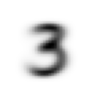

In [51]:
# Average over all training images
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

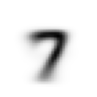

In [52]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

In [63]:
a_3 = stacked_threes[1]

diff3 = torch.sum(torch.sqrt((a_3 - mean3)**2), dim=(0, 1,)) / (a_3.shape[0] * a_3.shape[1])
diff7 = torch.sum(torch.sqrt((a_3 - mean7)**2), dim=(0, 1)) / (a_3.shape[0] * a_3.shape[1])

diff3, diff7

(tensor(0.1097), tensor(0.1413))

In [64]:
print(F.l1_loss(a_3.float(), mean7), F.l1_loss(a_3.float(), mean3))
print(F.mse_loss(a_3.float(), mean7), F.mse_loss(a_3.float(), mean3))

tensor(0.1413) tensor(0.1097)
tensor(0.0739) tensor(0.0387)


In [68]:
valid_3_tens = torch.stack([tensor(load_image(o)) for o in (path/"valid"/"3").ls()])
valid_7_tens = torch.stack([tensor(load_image(o)) for o in (path/"valid"/"7").ls()])

valid_3_tens = valid_3_tens.float() / 255
valid_7_tens = valid_7_tens.float() / 255

In [73]:
linear_model = nn.Linear(28*28, 1)
w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [74]:
class BasicOptim:
    def __init__(self, params, lr): self.params, self.lr = params, lr

    def step(self, *args, **kwargs):
        for p in self.params: p -= p.grad.data * self.lr
    
    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

opt = BasicOptim(linear_model.parameters, 0.01)